In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import cv2
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import tarfile
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atulanandjha/lfwpeople")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'lfwpeople' dataset.
Path to dataset files: /kaggle/input/lfwpeople


In [4]:
!tar -xvzf lfw_funneled/lfw-funneled.tgz -C lfw_funneled

tar (child): lfw_funneled/lfw-funneled.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [5]:
print(os.listdir("/root/.cache/kagglehub/datasets/atulanandjha/lfwpeople/versions/3"))

['pairsDevTrain.txt', 'lfw-funneled.tgz', 'pairsDevTest.txt', 'pairs.txt', 'lfw_funneled']


In [6]:
tgz_path = "/root/.cache/kagglehub/datasets/atulanandjha/lfwpeople/versions/3/lfw-funneled.tgz"

extract_path = "/root/.cache/kagglehub/datasets/atulanandjha/lfwpeople/versions/3/lfw_funneled"

with tarfile.open(tgz_path, "r:gz") as tar:
    tar.extractall(path=extract_path)

print("Extraction done!")

print("Number of folders:", len(os.listdir(extract_path)))
print("First 5:", os.listdir(extract_path)[:5])
import os

base_path = "/root/.cache/kagglehub/datasets/atulanandjha/lfwpeople/versions/3/lfw_funneled"

print("Number of folders:", len(os.listdir(base_path)))

print("First 5:", os.listdir(base_path)[:5])

/tmp/ipython-input-1032737233.py:6: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_path)


Extraction done!
Number of folders: 1
First 5: ['lfw_funneled']
Number of folders: 1
First 5: ['lfw_funneled']


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_lfw_people
import cv2

# PART 1: Load and Display Image Data
print("PART 1: Load and Display Image Data")

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

PART 1: Load and Display Image Data


In [8]:
# Extract image data and labels
images = lfw_people.images
labels = lfw_people.target
target_names = lfw_people.target_names

Number of images loaded: 1288
Number of different people: 7
Sample image shape: (50, 37)


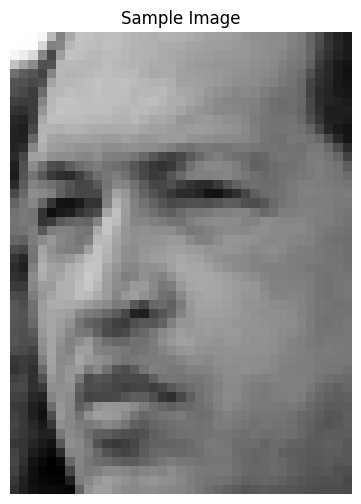

In [9]:
# Display the number of images and target names
print(f"Number of images loaded: {len(images)}")
print(f"Number of different people: {len(target_names)}")

# Display a sample image and its dimensions
sample_image = images[0]
print(f"Sample image shape: {sample_image.shape}")

plt.figure(figsize=(6, 6))
plt.imshow(sample_image, cmap='gray')
plt.title("Sample Image")
plt.axis('off')
plt.show()

In [10]:
# PART 3: Analyze Image Sizes
print("\nPART 3: Analyze Image Sizes")

# Extract height and width from image shapes
sizes = [img.shape[:2] for img in images]
sizes_df = pd.DataFrame(sizes, columns=['Height', 'Width'])

# Display basic statistics about image sizes
print("Image size statistics:")
print(sizes_df.describe())


PART 3: Analyze Image Sizes
Image size statistics:
       Height   Width
count  1288.0  1288.0
mean     50.0    37.0
std       0.0     0.0
min      50.0    37.0
25%      50.0    37.0
50%      50.0    37.0
75%      50.0    37.0
max      50.0    37.0


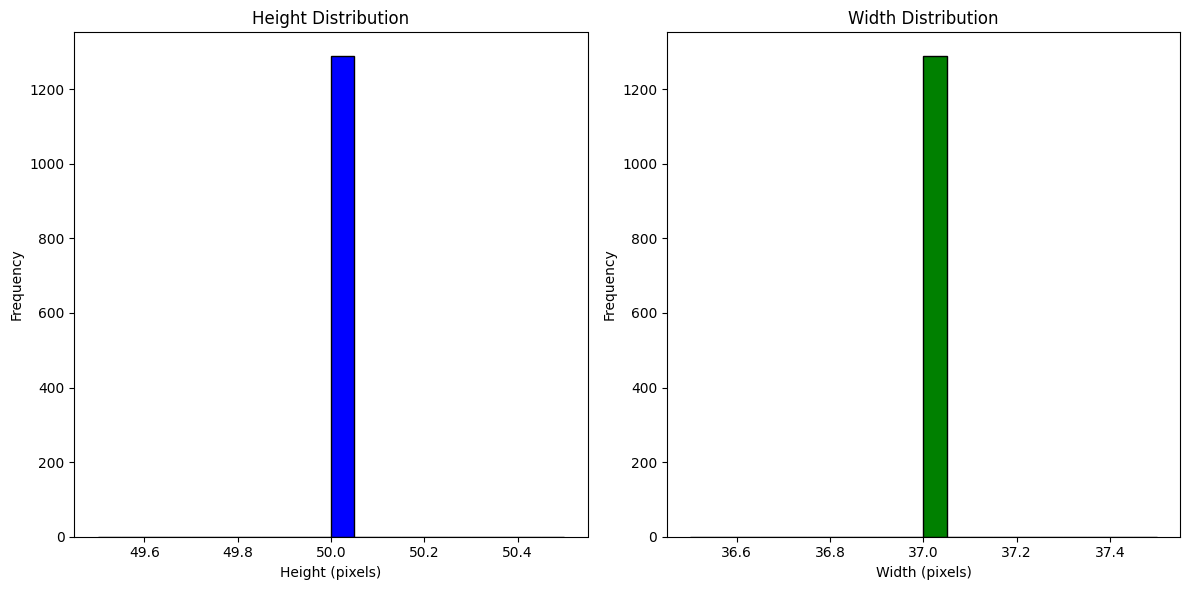

In [11]:
# Plot histograms for image height and width
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(sizes_df['Height'], bins=20, color='blue', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sizes_df['Width'], bins=20, color='green', edgecolor='black')
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
# PART 4: Analyze Image Color Distribution
print("\nPART 4: Analyze Image Color Distribution")

def get_color_distribution(image):
    """
    Compute the color distribution histogram of an image.

    Parameters:
    - image (numpy array): The image for which to compute the color distribution.

    Returns:
    - color_distribution (numpy array): The color distribution histogram.
    """
    # Convert grayscale image to BGR format for consistency
    image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    color_distribution = cv2.calcHist([image_bgr], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
    return color_distribution

# Compute and plot color distribution for a sample image
sample_image = images[0]
color_dist = get_color_distribution(sample_image)


PART 4: Analyze Image Color Distribution


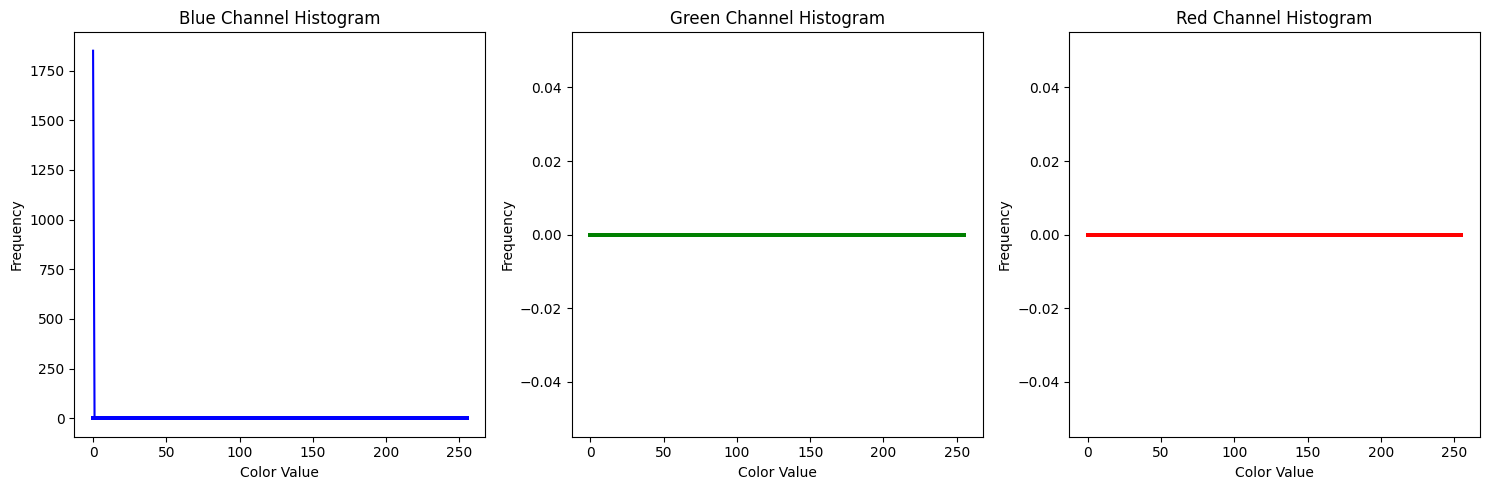

In [13]:
# Plot color distribution for each channel
plt.figure(figsize=(15, 5))

# Colors for plotting
colors = ['Blue', 'Green', 'Red']
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    plt.plot(color_dist[i], color=color.lower())
    plt.title(f'{color} Channel Histogram')
    plt.xlabel('Color Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
# PART 5: Additional Image Analysis
print("\nPART 5: Additional Image Analysis")

# Function to compute image entropy
def compute_entropy(image):
    """
    Compute the entropy of an image, which measures the amount of information.

    Parameters:
    - image (numpy array): The image for which to compute the entropy.

    Returns:
    - entropy (float): The entropy value of the image.
    """
    image_gray = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Ensure image is in BGR format
    histogram = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
    histogram = histogram / histogram.sum()
    entropy = -np.sum(histogram * np.log2(histogram + np.finfo(float).eps))
    return entropy

# Compute entropy for a sample image
entropy = compute_entropy(sample_image)
print(f"Entropy of sample image: {entropy:.2f}")


PART 5: Additional Image Analysis
Entropy of sample image: -0.00


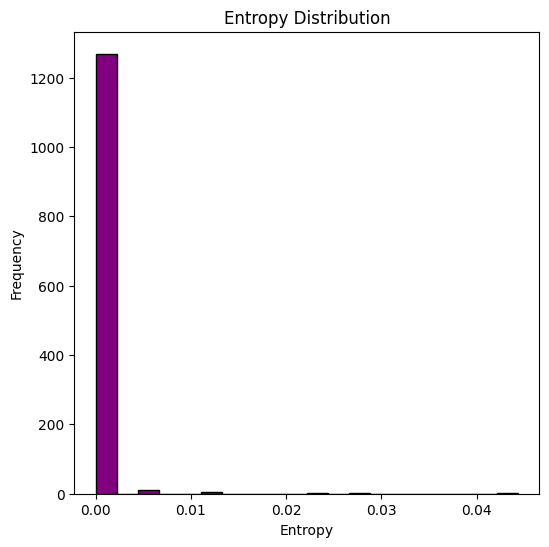

In [15]:
# Display the entropy histogram
plt.figure(figsize=(6, 6))
plt.hist([compute_entropy(img) for img in images], bins=20, color='purple', edgecolor='black')
plt.title('Entropy Distribution')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.show()

In [16]:
# PART 6: Summary of Findings
print("\nPART 6: Summary of Findings")

# Summarize findings from the EDA
print(f"Total number of images: {len(images)}")
print(f"Sample image dimensions (height x width): {sample_image.shape[0]} x {sample_image.shape[1]}")
print(f"Sample image entropy: {entropy:.2f}")

# Show a brief summary of size and color distribution
print("Size Distribution Summary:")
print(sizes_df.describe())

print("Color Distribution Summary:")
print("Color distribution of sample image plotted.")

print("Entropy Distribution Summary:")
print("Histogram of image entropy plotted.")


PART 6: Summary of Findings
Total number of images: 1288
Sample image dimensions (height x width): 50 x 37
Sample image entropy: -0.00
Size Distribution Summary:
       Height   Width
count  1288.0  1288.0
mean     50.0    37.0
std       0.0     0.0
min      50.0    37.0
25%      50.0    37.0
50%      50.0    37.0
75%      50.0    37.0
max      50.0    37.0
Color Distribution Summary:
Color distribution of sample image plotted.
Entropy Distribution Summary:
Histogram of image entropy plotted.


In [17]:
!pip install dlib


In [18]:
!pip install face_recognition



                           precision    recall  f1-score   support

         Alejandro Toledo       0.67      0.50      0.57        12
             Alvaro Uribe       0.50      0.83      0.62         6
          Amelie Mauresmo       1.00      0.50      0.67         6
             Andre Agassi       0.38      0.50      0.43         6
           Angelina Jolie       0.67      0.33      0.44         6
             Ariel Sharon       0.53      0.64      0.58        14
    Arnold Schwarzenegger       0.56      0.36      0.43        14
     Atal Bihari Vajpayee       0.50      0.33      0.40         6
             Bill Clinton       0.27      0.60      0.38         5
             Carlos Menem       0.60      0.75      0.67         4
             Colin Powell       0.81      0.80      0.80        59
            David Beckham       0.17      0.50      0.25         2
          Donald Rumsfeld       0.57      0.43      0.49        30
         George Robertson       0.75      0.75      0.75     

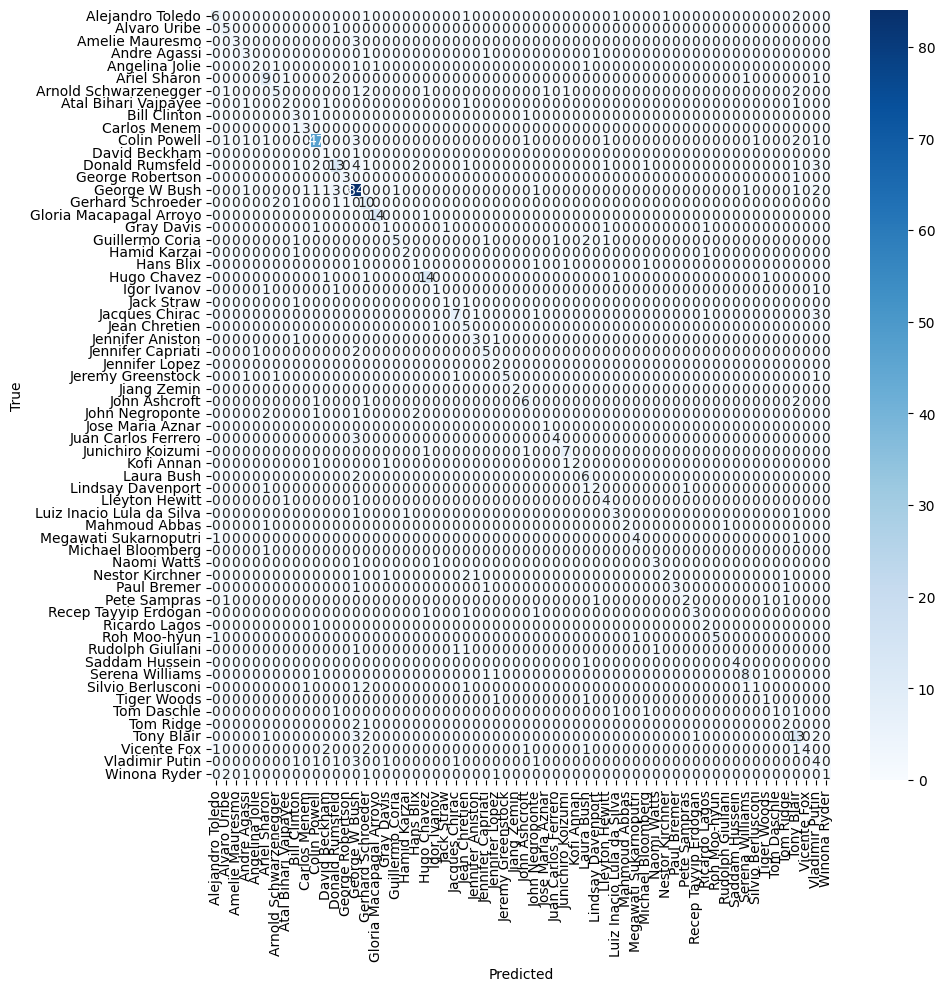

In [19]:
# This notebook trains a facial recognition model using the LFW dataset.
# It includes steps for downloading the dataset, extracting face encodings, and training a model.

# استيراد المكتبات
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# تحميل البيانات
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.5)
images = lfw_people.images       # الصور
labels = lfw_people.target       # الأرقام
target_names = lfw_people.target_names  # أسماء الأشخاص

# Flatten الصور (SVM يحتاج 2D)
n_samples, h, w = images.shape
X = images.reshape(n_samples, -1)

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# تدريب نموذج SVM
model = SVC(kernel='linear', class_weight='balanced')
model.fit(X_train, y_train)

# تقييم الأداء
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

# رسم Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [20]:


# PART 2: Convert Images to Feature Vectors
print("\nPART 2: Convert Images to Feature Vectors")

# Flatten الصور
n_samples, h, w = images.shape
X = images.reshape(n_samples, -1)  # كل صورة تتحول لمتجه 1D
y = labels
import os

# إنشاء المجلد لو مش موجود
os.makedirs('../data/processed/', exist_ok=True)

# حفظ الملفات بعد إنشاء المجلد
np.save('../data/processed/face_features.npy', X)
np.save('../data/processed/labels.npy', y)

print("Feature vectors and labels saved successfully!")

# Save the feature vectors and labels
np.save('../data/processed/face_features.npy', X)
np.save('../data/processed/labels.npy', y)

print("Feature vectors and labels saved successfully!")



PART 2: Convert Images to Feature Vectors
Feature vectors and labels saved successfully!
Feature vectors and labels saved successfully!


In [21]:

# PART 3: Load and Prepare Data
print("\nPART 3: Load and Prepare Data")

# Load feature vectors and labels (بدل face_encodings)
X = np.load('../data/processed/face_features.npy')
y = np.load('../data/processed/labels.npy')

# Check data shapes and types
print(f"Feature vectors shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



PART 3: Load and Prepare Data
Feature vectors shape: (3023, 2914)
Labels shape: (3023,)


In [22]:
# PART 4: Train the Model
print("\nPART 4: Train the Model")

import os
import joblib
from sklearn.svm import SVC

# إنشاء المجلد لو مش موجود
os.makedirs('../data/models/', exist_ok=True)

# Initialize and train the model
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# Save the trained model
model_file = '../data/models/face_recognition_model.pkl'
joblib.dump(model, model_file)
print(f"Model saved to {model_file}")



PART 4: Train the Model
Model saved to ../data/models/face_recognition_model.pkl



PART 5: Evaluate the Model
Confusion Matrix:
[[6 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [1 0 0 ... 4 0 0]
 [0 0 0 ... 0 4 0]
 [0 2 0 ... 0 0 1]]

Classification Report:
                           precision    recall  f1-score   support

         Alejandro Toledo       0.67      0.50      0.57        12
             Alvaro Uribe       0.50      0.83      0.62         6
          Amelie Mauresmo       1.00      0.50      0.67         6
             Andre Agassi       0.38      0.50      0.43         6
           Angelina Jolie       0.67      0.33      0.44         6
             Ariel Sharon       0.53      0.64      0.58        14
    Arnold Schwarzenegger       0.62      0.36      0.45        14
     Atal Bihari Vajpayee       0.50      0.33      0.40         6
             Bill Clinton       0.25      0.60      0.35         5
             Carlos Menem       0.60      0.75      0.67         4
             Colin Powell       0.82      0.78      0.80        59
     

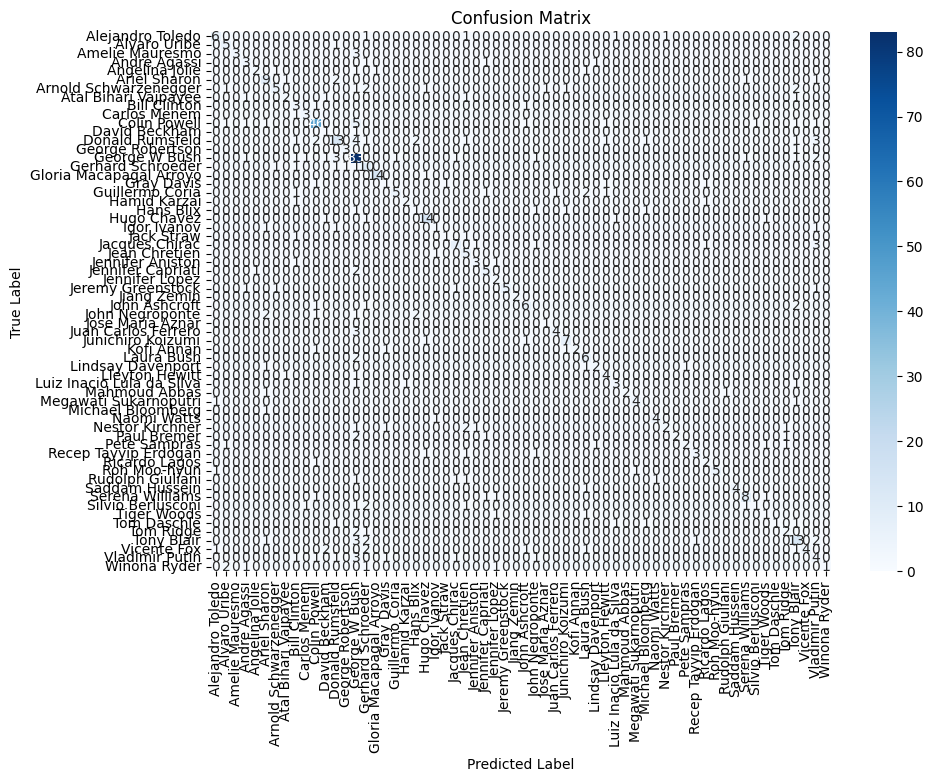

In [24]:
# PART 5: Evaluate the Model
print("\nPART 5: Evaluate the Model")

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [25]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")


Model Accuracy: 60.33%


In [27]:
import joblib

# حفظ الموديل
joblib.dump(model, "face_model.pkl")

# لتحميل الموديل مرة تانية
model = joblib.load("face_model.pkl")
